In [1]:
import yfinance as yf;

In [2]:
from datetime import datetime
end = datetime.now()
print(end)
start = datetime(end.year-10, end.month, end.day)

2025-01-04 18:05:58.369440


In [3]:
stock = "AAPL"
apple_data = yf.download(stock, start, end)
apple_data.to_csv('aapl.csv')
len(apple_data)

[*********************100%***********************]  1 of 1 completed


2517

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('aapl.csv', skiprows=[1, 2])


In [6]:
df.head()

,Price,Close,High,Low,Open,Volume
0,2015-01-05,23.661276,24.195743,23.474213,24.115573,257142000
1,2015-01-06,23.663509,23.924061,23.300516,23.725864,263188400
2,2015-01-07,23.995316,24.095527,23.761486,23.872833,160423600
3,2015-01-08,24.917269,24.975170,24.206873,24.324903,237458000
4,2015-01-09,24.943989,25.220129,24.543138,25.090966,214798000


In [7]:
df.tail()

,Price,Close,High,Low,Open,Volume
2512,2024-12-27,255.589996,258.700012,253.059998,257.829987,42355300
2513,2024-12-30,252.199997,253.500000,250.750000,252.229996,35557500
2514,2024-12-31,250.419998,253.279999,249.429993,252.440002,39480700
2515,2025-01-02,243.850006,249.100006,241.820007,248.929993,55740700
2516,2025-01-03,243.360001,244.179993,241.889999,243.360001,40202700


In [8]:
df1=df.reset_index()['Close']
# df1 = df1.drop([0, 1])
df1

0        23.661276
1        23.663509
2        23.995316
3        24.917269
4        24.943989
           ...    
2512    255.589996
2513    252.199997
2514    250.419998
2515    243.850006
2516    243.360001
Name: Close, Length: 2517, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [10]:
import numpy as np

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
print(df1)

[[0.01243692]
 [0.01244626]
 [0.01383857]
 ...
 [0.96391452]
 [0.93634689]
 [0.93429083]]


In [13]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [14]:
training_size,test_size
train_data

array([[0.01243692],
       [0.01244626],
       [0.01383857],
       ...,
       [0.47690662],
       [0.47818284],
       [0.48925539]])

In [15]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [16]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step) 


In [17]:
print(X_train.shape), print(y_train.shape)

(1535, 100)
(1535,)


(None, None)

In [18]:
print(X_test.shape), print(ytest.shape)

(780, 100)
(780,)


(None, None)

In [19]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [20]:
### Create the Stacked LSTM model
# import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [21]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

c:\Users\Kushwaha Pradeep\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 218ms/step - loss: 0.0135 - val_loss: 0.0014
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 177ms/step - loss: 5.5535e-04 - val_loss: 0.0021
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - loss: 2.5761e-04 - val_loss: 0.0015
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step - loss: 2.3251e-04 - val_loss: 0.0017
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 176ms/step - loss: 2.4813e-04 - val_loss: 0.0017
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step - loss: 2.5856e-04 - val_loss: 0.0024
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 180ms/step - loss: 2.0346e-04 - val_loss: 0.0031
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 179ms/step - loss: 2.1185e-04 - val_loss: 0.0031
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - loss: 1.9561e-04 - val_loss: 0.0021
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 177ms/step - loss: 1.8802e-04 - val_loss: 0.0018
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step - loss: 1.8703e-04 - val_loss: 0.0021


In [24]:
import tensorflow as tf

In [25]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


In [26]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [27]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

63.94699812211083

In [28]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

171.18210875220313

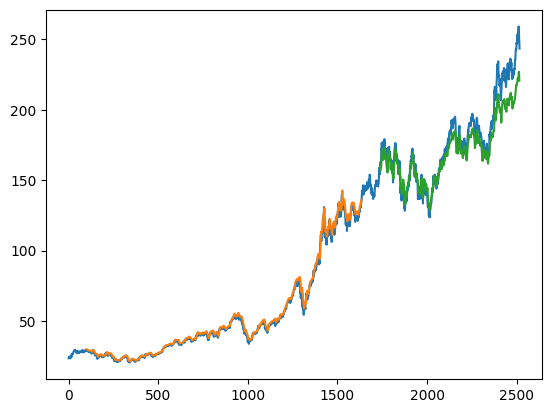

In [29]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [30]:
len(test_data)

881

In [31]:
x_input=test_data[781:].reshape(1,-1)
x_input.shape

(1, 100)

In [32]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.8405810246444444,
 0.8424671589760693,
 0.8550413024859121,
 0.8606158317588536,
 0.8599452261378401,
 0.862543838925703,
 0.8620827895580384,
 0.8542449503077408,
 0.8639269870286967,
 0.8653520719926571,
 0.8689147203768158,
 0.8624600292295118,
 0.8762915742851907,
 0.8729804190153475,
 0.8468680963993659,
 0.8388207008957193,
 0.8452334551820566,
 0.8386949543385614,
 0.839072129984293,
 0.835719037853483,
 0.8464070470317014,
 0.8468680963993659,
 0.8457364414106877,
 0.819833739073797,
 0.821803619075871,
 0.8381500312489637,
 0.8724354959257499,
 0.8696272628587958,
 0.8623762195333206,
 0.8661484241708284,
 0.8619570430008807,
 0.8667771569566172,
 0.8679088119452953,
 0.8897459436951382,
 0.8612865014056089,
 0.863675557940123,
 0.8590230633767689,
 0.8637593676363143,
 0.8423414124189114,
 0.8594422399092088,
 0.8752437289927039,
 0.8731480384077299,
 0.8669029035137751,
 0.8826205829010787,
 0.893308592079297,
 0.8846323997641194,
 0.8861832312852373,
 0.8981286420092913,

In [33]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [34]:
import matplotlib.pyplot as plt

In [35]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        # x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = np.array(temp_input)
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.81288755]
101
1 day input [0.84246716 0.8550413  0.86061583 0.85994523 0.86254384 0.86208279
 0.85424495 0.86392699 0.86535207 0.86891472 0.86246003 0.87629157
 0.87298042 0.8468681  0.8388207  0.84523346 0.83869495 0.83907213
 0.83571904 0.84640705 0.8468681  0.84573644 0.81983374 0.82180362
 0.83815003 0.8724355  0.86962726 0.86237622 0.86614842 0.86195704
 0.86677716 0.86790881 0.88974594 0.8612865  0.86367556 0.85902306
 0.86375937 0.84234141 0.85944224 0.87524373 0.87314804 0.8669029
 0.88262058 0.89330859 0.8846324  0.88618323 0.89812864 0.9043319
 0.90173329 0.88035721 0.87956092 0.88308163 0.89142246 0.89255411
 0.87759091 0.86002904 0.84745489 0.84368262 0.8497182  0.84665854
 0.86660947 0.8654766  0.8540215  0.8540215  0.85775593 0.87076353
 0.85725243 0.86992434 0.87101528 0.8740364  0.87202234 0.87768689
 0.89027486 0.89946409 0.89891859 0.90898901 0.91847193 0.93131165
 0.93282221 0.93294808 0.9321089  0.94851524 0.95279517 0.9474243
 0.95359241 0.95430572 0.96651601 0.

In [44]:
len(df1)

2517

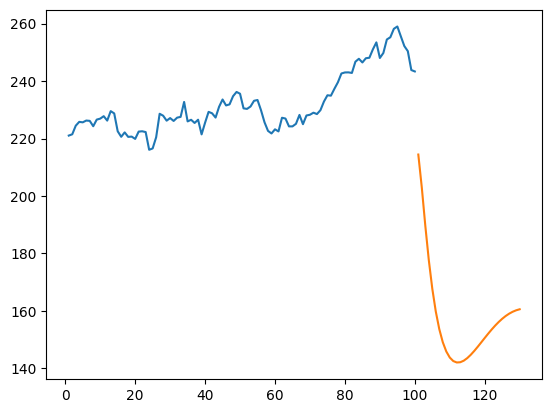

In [47]:
plt.plot(day_new,scaler.inverse_transform(df1[2417:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

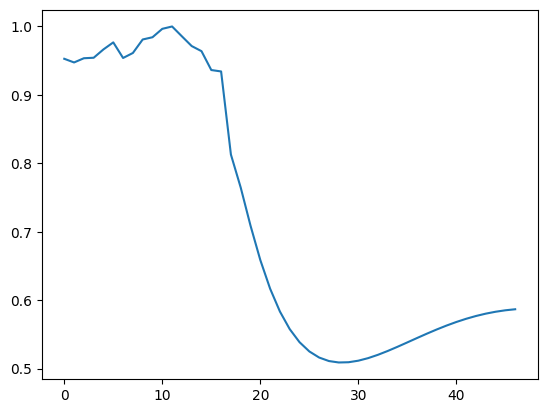

In [48]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[2500:])

In [49]:
df3=scaler.inverse_transform(df3).tolist()

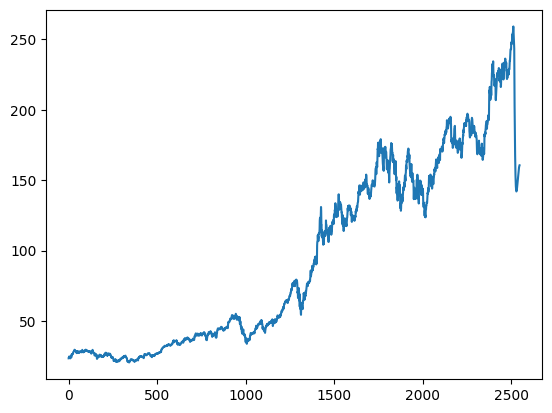

In [50]:
plt.plot(df3)